In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns


sns.set()
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

### About Diabetic Retinopathy Dataset 

#### Diabetic Retinopathy: 
Diabetic Retinopathy is a eye disease which damage occurs to the retina due to diabetes mellitus. It is a leading cause of blindness. Approximatly, 8M people have Diabetic Retinopathy in Bangladesh according to IDF DIABETES ATLAS-2017. 

#### Our goal:  
This dataset contains features extracted from the Messidor image set to predict whether an image contains signs of diabetic retinopathy or not. 

#### Dataset format: 
This dataset given arff format. ARFF stands for Attribute-Relation File Format. 

#### More about dataset and format:
Dataset information: https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set# 

ARFF format information: https://www.cs.waikato.ac.nz/~ml/weka/arff.html

### Load the dataset

In [2]:
from scipy.io import arff
data = arff.loadarff('messidor_features.arff')
df = pd.DataFrame(data[0])

df.head() # Return top 5 rows 

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,Class
0,1.0,1.0,22.0,22.0,22.0,19.0,18.0,14.0,49.895756,17.775994,5.270920,0.771761,0.018632,0.006864,0.003923,0.003923,0.486903,0.100025,1.0,b'0'
1,1.0,1.0,24.0,24.0,22.0,18.0,16.0,13.0,57.709936,23.799994,3.325423,0.234185,0.003903,0.003903,0.003903,0.003903,0.520908,0.144414,0.0,b'0'
2,1.0,1.0,62.0,60.0,59.0,54.0,47.0,33.0,55.831441,27.993933,12.687485,4.852282,1.393889,0.373252,0.041817,0.007744,0.530904,0.128548,0.0,b'1'
3,1.0,1.0,55.0,53.0,53.0,50.0,43.0,31.0,40.467228,18.445954,9.118901,3.079428,0.840261,0.272434,0.007653,0.001531,0.483284,0.114790,0.0,b'0'
4,1.0,1.0,44.0,44.0,44.0,41.0,39.0,27.0,18.026254,8.570709,0.410381,0.000000,0.000000,0.000000,0.000000,0.000000,0.475935,0.123572,0.0,b'1'


In [3]:
df.shape # Shape of the data

(1151, 20)

### Exploratory Data Analysis

#### Variable Identification 
* $0$ = 0 is the result of quality assessment, which is a real number between  (worst) and 1 (best) quality for a color fundus image. 
* $1$ = The binary result of pre-screening, where 1 indicates severe retinal abnormality and 0 its ack.
* $2$ = Number of MAs(Microaneurisms)found at the confidence levels alpha = 0.5
* $3$ = Number of MAs(Microaneurisms)found at the confidence levels alpha = 0.6
* $4$ = Number of MAs(Microaneurisms)found at the confidence levels alpha = 0.7
* $5$ = Number of MAs(Microaneurisms)found at the confidence levels alpha = 0.8
* $6$ = Number of MAs(Microaneurisms)found at the confidence levels alpha = 0.9
* $7$ = Number of MAs(Microaneurisms)found at the confidence levels alpha = 1.0
* $8$ = Number of Exudates found at the confidence levels alpha = 0.5
* $9$ = Number of Exudates found at the confidence levels alpha = 0.6
* $10$ = Number of Exudates found at the confidence levels alpha = 0.7
* $11$ = Number of Exudates found at the confidence levels alpha = 0.8
* $12$ = Number of Exudates found at the confidence levels alpha = 0.9
* $13$ = Number of Exudates found at the confidence levels alpha = 1.0
* $14$ = Number of Exudates found at the confidence levels alpha = 1.0
* $15$ = Number of Exudates found at the confidence levels alpha = 1.0
* $16$ = The euclidean distance of the center of the macula and the center of the optic disc
* $17$ = The diameter of the optic disc
* $18$ =  The binary result of the AM(Amplitude-modulation)/FM(Frequency-modulation) based classification
* $Class$ = Class label. 1 = contains signs of DR, 0 = no signs of DR

#### Overview of Numerical and Categorical Columns 

In [4]:
print("""
No of columns: {}
No of rows: {}
No of categorical columns: {}
No of numerical columns: {}""".format(df.shape[1], 
                                      df.shape[0],
                                      len(df.select_dtypes('O').columns),
                                      len(df.select_dtypes(['int64', 'float64']).columns)))


No of columns: 20
No of rows: 1151
No of categorical columns: 1
No of numerical columns: 19


#### Brief Summary of a DataFrame

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1151 entries, 0 to 1150
Data columns (total 20 columns):
0        1151 non-null float64
1        1151 non-null float64
2        1151 non-null float64
3        1151 non-null float64
4        1151 non-null float64
5        1151 non-null float64
6        1151 non-null float64
7        1151 non-null float64
8        1151 non-null float64
9        1151 non-null float64
10       1151 non-null float64
11       1151 non-null float64
12       1151 non-null float64
13       1151 non-null float64
14       1151 non-null float64
15       1151 non-null float64
16       1151 non-null float64
17       1151 non-null float64
18       1151 non-null float64
Class    1151 non-null object
dtypes: float64(19), object(1)
memory usage: 179.9+ KB


#### Target class given object type format. So, converting traget class to numeric value.  

In [6]:
df['Class'] = pd.to_numeric(df['Class']).astype(int)

#### Statistical view of Numerical Columns

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,1151.0,0.996525,0.058874,0.000000,1.000000,1.000000,1.000000,1.000000
1,1151.0,0.918332,0.273977,0.000000,1.000000,1.000000,1.000000,1.000000
2,1151.0,38.428323,25.620913,1.000000,16.000000,35.000000,55.000000,151.000000
3,1151.0,36.909644,24.105612,1.000000,16.000000,35.000000,53.000000,132.000000
4,1151.0,35.140747,22.805400,1.000000,15.000000,32.000000,51.000000,120.000000
5,1151.0,32.297133,21.114767,1.000000,14.000000,29.000000,48.000000,105.000000
6,1151.0,28.747176,19.509227,1.000000,11.000000,25.000000,43.000000,97.000000
7,1151.0,21.151173,15.101560,1.000000,8.000000,18.000000,32.000000,89.000000
8,1151.0,64.096674,58.485289,0.349274,22.271597,44.249119,87.804112,403.939108
9,1151.0,23.088012,21.602696,0.000000,7.939315,17.038020,31.305692,167.131427


#### Every attributes had same count values that means no missing values on whole dataset.From '2' to '17' had outliers values. For example, considering mean, min and max values of '2' and '3' attributes. In addition, 50% represented as median value, distance between min and median or max and median larger most of the case.       

In [8]:
df.skew()

0       -16.896668
1        -3.059084
2         0.743916
3         0.625170
4         0.532673
5         0.498474
6         0.533248
7         0.722384
8         1.646758
9         2.135273
10        2.957648
11        6.425332
12       11.964313
13       11.526713
14        8.316157
15        9.232702
16       -0.190741
17        0.792773
18        0.694234
Class    -0.123768
dtype: float64

#### Attributes '0','1','16' had negative skew and other positive skew.  

#### Numerical distribution of the data

<Figure size 432x288 with 0 Axes>

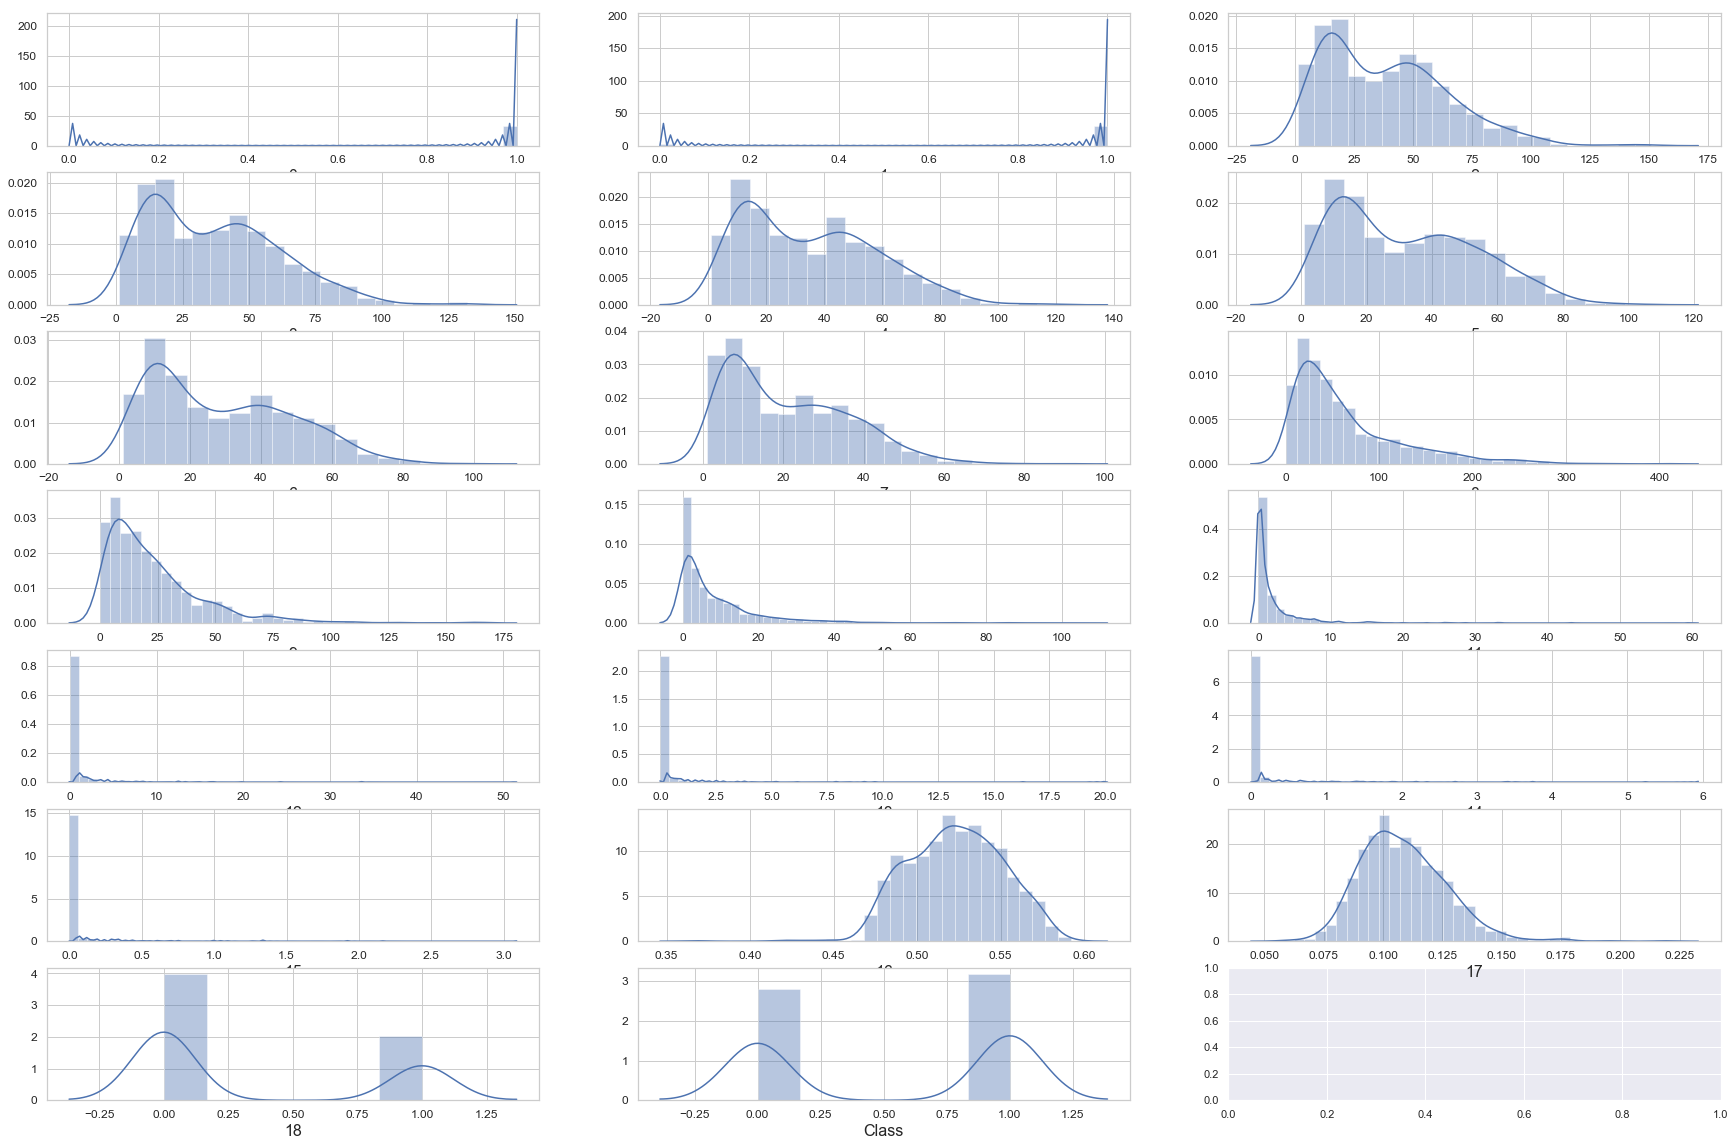

In [9]:
def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(30,20))
    sns.set_style("whitegrid")

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(data[feature])
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(df, df.columns)

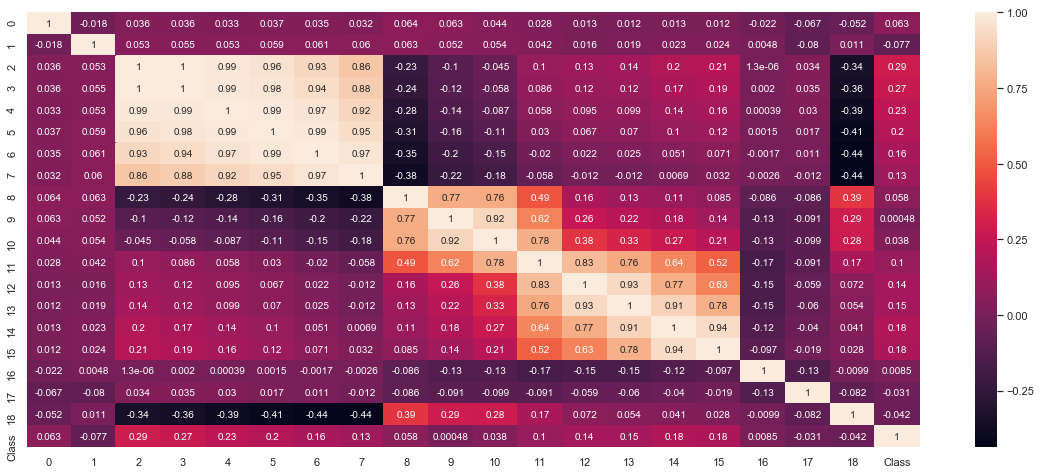

In [10]:
corr_matrix =  df.corr()
fig = plt.figure(figsize = (20, 8))
sns.heatmap(corr_matrix, annot = True)

#### Attibutes '2', '3', '4', '5', '6' '7' had strong corelation with target class comparing others but they shared same types information.  '1', '8','9','14','15','17' and '18' had negtive corelation with target class.

In [11]:
#df.isna().sum() 

#### Outliers analysis of numerical columns 

<Figure size 432x288 with 0 Axes>

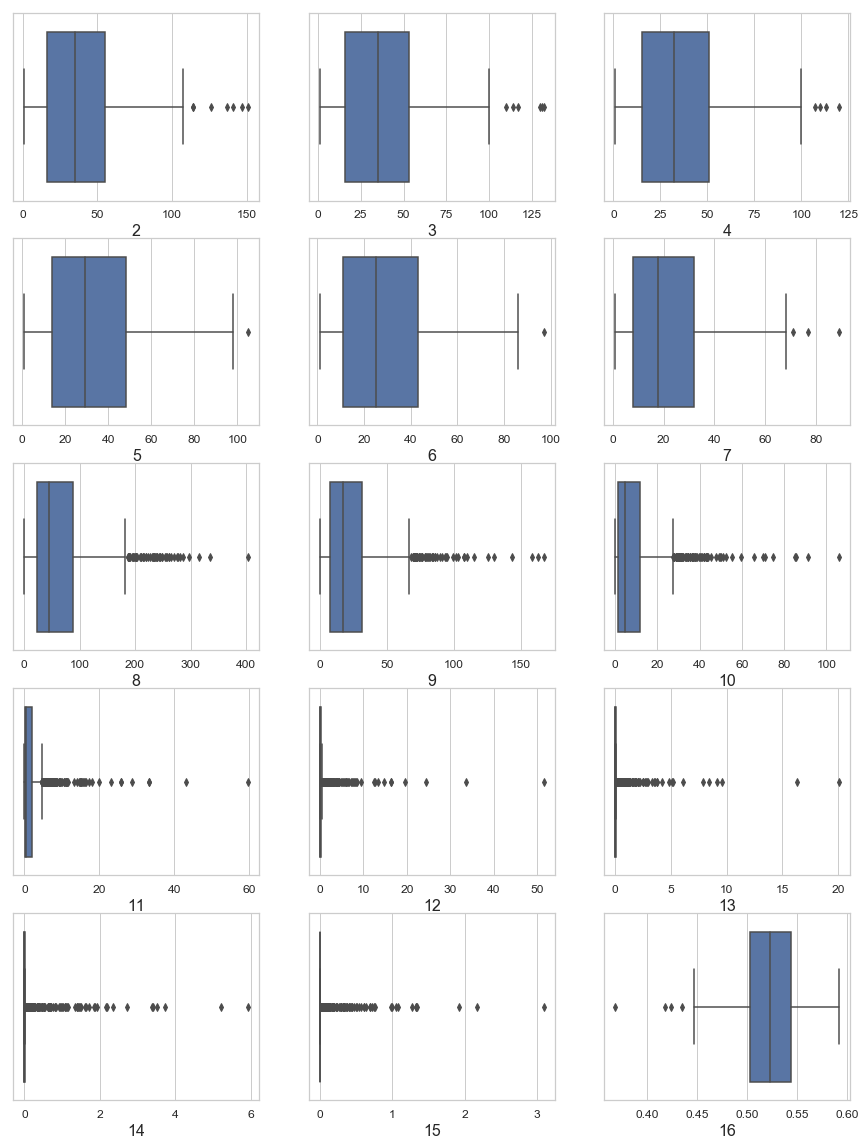

In [12]:
numerical_col = ['2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16']
def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(15,20))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.boxplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(df, numerical_col)

#### Remove outliers

In [13]:
# Detect outliers using interquartile range

def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

# Caping the outliers
for col in numerical_col:
    indx = detect_outlier(df[col])
    df[col].loc[indx] = df[col].median()

#### Checking Imbalanced class

In [14]:
df['Class'].value_counts()

1    611
0    540
Name: Class, dtype: int64

#### Given data not imbalanced 

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(df)

array([[ 0.05905386,  0.2982129 , -0.64630207, ..., -0.46865568,
         1.40504812, -1.06371118],
       [ 0.05905386,  0.2982129 , -0.56466317, ...,  2.00605415,
        -0.7117194 , -1.06371118],
       [ 0.05905386,  0.2982129 ,  0.98647599, ...,  1.1215164 ,
        -0.7117194 ,  0.94010481],
       ...,
       [ 0.05905386, -3.35330894,  0.45582312, ...,  1.19371332,
        -0.7117194 , -1.06371118],
       [ 0.05905386,  0.2982129 ,  0.0476286 , ..., -0.09707846,
         1.40504812,  0.94010481],
       [ 0.05905386,  0.2982129 , -1.25859384, ..., -1.08570243,
        -0.7117194 , -1.06371118]])

### Data Segregation

In [16]:
X = df.loc[:,df.columns != 'Class']
y = df.loc[:,df.columns == 'Class']

### Model

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=True, random_state=123)

print("""Training datset: {},
Validation Dataset: {},
Test Dataset: {},
""".format(X_train.shape, X_val.shape, X_test.shape))

Training datset: (736, 19),
Validation Dataset: (184, 19),
Test Dataset: (231, 19),



In [18]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
12,1.0,1.0,70.0,69.0,65.0,63.0,63.0,50.0,10.560100,3.108358,0.625511,0.287959,0.103985,0.004799,0.000000,0.000000,0.534396,0.089587,0.0
1079,1.0,1.0,28.0,28.0,25.0,22.0,21.0,15.0,90.479140,55.790363,24.653349,3.508139,0.022248,0.001554,0.004058,0.000000,0.522802,0.140001,1.0
173,1.0,1.0,14.0,14.0,14.0,14.0,11.0,8.0,39.998599,26.133902,6.321156,0.131927,0.000000,0.000000,0.000000,0.000000,0.553831,0.083485,0.0
1007,1.0,1.0,35.0,35.0,34.0,32.0,30.0,22.0,16.740482,8.434313,0.453906,0.000000,0.000000,0.000000,0.000000,0.000000,0.478857,0.111161,1.0
58,1.0,1.0,56.0,55.0,46.0,41.0,37.0,28.0,6.960789,2.747318,1.544124,0.631409,0.201806,0.001554,0.000000,0.000000,0.522871,0.102432,1.0
117,1.0,1.0,43.0,43.0,43.0,41.0,39.0,22.0,47.749076,26.632220,4.384047,0.436208,0.000000,0.000000,0.000000,0.000000,0.508396,0.117682,0.0
956,1.0,1.0,35.0,29.0,24.0,19.0,14.0,9.0,51.114355,11.394315,3.215894,0.474459,0.168928,0.001554,0.000000,0.000000,0.533062,0.141816,0.0
394,1.0,1.0,62.0,59.0,55.0,51.0,41.0,26.0,32.349761,11.285372,3.564530,1.346498,0.116819,0.039965,0.001537,0.001537,0.529271,0.129116,0.0
79,1.0,1.0,34.0,34.0,28.0,22.0,17.0,9.0,80.102809,35.595044,7.515836,0.929973,0.259930,0.001554,0.000000,0.003851,0.515703,0.095308,0.0
954,1.0,1.0,33.0,33.0,33.0,32.0,30.0,24.0,23.087891,10.650887,1.509093,0.140808,0.013775,0.000000,0.000000,0.000000,0.492785,0.122442,0.0


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold 

seed = 123
log_reg = LogisticRegression().fit(X_train, y_train) # train

skf = StratifiedKFold(n_splits=10, random_state = seed)
log_reg_cv = cross_val_score(log_reg, X_train, y_train, cv=skf, scoring='accuracy') #Cross-Validation
 
log_reg_ytest = log_reg.predict(X_test) #predict

acc_test = accuracy_score(y_test, log_reg_ytest) # test accuracy

print("Logistic Regression Cross Validation Accuracy: {}".format(log_reg_cv.mean()))
print("Logistic Regression Test Accuracy: {}".format(acc_test))

Logistic Regression Cross Validation Accuracy: 0.7268145131432802
Logistic Regression Test Accuracy: 0.670995670995671


### Decision Tree Classifier

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_cls = DecisionTreeClassifier(random_state = seed).fit(X_train, y_train) # train

skf = StratifiedKFold(n_splits=10)
dt_cls_cv = cross_val_score(dt_cls, X_train, y_train, cv=10, scoring='accuracy') # cross-Validation

dt_cls_ytest = dt_cls.predict(X_test) # test accuracy
acc_test = accuracy_score(y_test, dt_cls_ytest)

print("Decision Tree Cross Validation Accuracy: {}".format(dt_cls_cv.mean()))
print("Decision Tree Test Accuracy: {}".format(acc_test))

Decision Tree Cross Validation Accuracy: 0.6100940392447242
Decision Tree Test Accuracy: 0.6493506493506493


In [21]:
from sklearn import tree
import pydotplus

dot_data = tree.export_graphviz(dt_cls,
                                feature_names=X_train.columns,
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_svg('tree.svg')

True

### Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators = 200, random_state = seed, max_depth = 10).fit(X_train, y_train) # train

rf_cls_cv = cross_val_score(rf_classifier, X_train, y_train, cv = 10, scoring = 'accuracy') # cross-validation

rf_cls_ytest = rf_classifier.predict(X_test) # predict 
acc_test = accuracy_score(y_test, rf_cls_ytest) # test accuracy

print("Random Forest Cross validation Accuracy : {}".format(rf_cls_cv.mean()))
print("Random Forest Test Accuracy: {}".format(acc_test))

Random Forest Cross validation Accuracy : 0.6929006540787362
Random Forest Test Accuracy: 0.6536796536796536


#### Evaluating SVM with confusion matrix

In [23]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,rf_cls_ytest))  
print(classification_report(y_test,rf_cls_ytest))  

[[74 34]
 [46 77]]
              precision    recall  f1-score   support

           0       0.62      0.69      0.65       108
           1       0.69      0.63      0.66       123

    accuracy                           0.65       231
   macro avg       0.66      0.66      0.65       231
weighted avg       0.66      0.65      0.65       231



### Support Vector Machine

In [24]:
from sklearn.svm import SVC  

sv_classifier = SVC(kernel='linear')  
sv_classifier.fit(X_train, y_train)  # train

sv_cls_cv = cross_val_score(sv_classifier, X_train, y_train, cv=10, scoring='accuracy') #Cross-Validation

sv_cls_ytest = sv_classifier.predict(X_test) # predict

acc_test = accuracy_score(y_test, sv_cls_ytest) # Test Accuracy 

print("Support Vector Machine Cross Validation Accuracy: {}".format(sv_cls_cv.mean()))
print("Support Vector Machine Test Accuracy: {}".format(acc_test))

Support Vector Machine Cross Validation Accuracy: 0.7418284585955818
Support Vector Machine Test Accuracy: 0.696969696969697


#### Evaluating SVM with confusion matrix

In [25]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,sv_cls_ytest))  
print(classification_report(y_test,sv_cls_ytest))  

[[97 11]
 [59 64]]
              precision    recall  f1-score   support

           0       0.62      0.90      0.73       108
           1       0.85      0.52      0.65       123

    accuracy                           0.70       231
   macro avg       0.74      0.71      0.69       231
weighted avg       0.75      0.70      0.69       231



### K-Nearest Neighbors

In [26]:
from sklearn.neighbors import KNeighborsClassifier

KNN_classifier = KNeighborsClassifier(n_neighbors=5) 
KNN_classifier.fit(X_train, y_train) # train

skf = StratifiedKFold(n_splits=8)
KNN_cls_cv = cross_val_score(KNN_classifier, X_train, y_train, cv=skf, scoring='accuracy') #Cross-Validation

KNN_cls_ytest = KNN_classifier.predict(X_test) # predict

acc_test = accuracy_score(y_test, KNN_cls_ytest) # Test Accuracy 

print("KNN Cross Validation Accuracy: {}".format(KNN_cls_cv.mean()))
print("KNN Test Accuracy: {}".format(acc_test))

KNN Cross Validation Accuracy: 0.6616443251699213
KNN Test Accuracy: 0.6363636363636364


#### Evaluating KNN with confusion matrix

In [27]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,KNN_cls_ytest))  
print(classification_report(y_test,KNN_cls_ytest))  

[[73 35]
 [49 74]]
              precision    recall  f1-score   support

           0       0.60      0.68      0.63       108
           1       0.68      0.60      0.64       123

    accuracy                           0.64       231
   macro avg       0.64      0.64      0.64       231
weighted avg       0.64      0.64      0.64       231



### Naive Bayes

In [28]:
from sklearn.naive_bayes import GaussianNB

NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train) # train

skf = StratifiedKFold(n_splits = 10)
NB_cls_cv = cross_val_score(NB_classifier, X_train, y_train, cv=skf, scoring='accuracy') #Cross-Validation

NB_cls_ytest = NB_classifier.predict(X_test) # predict

acc_test = accuracy_score(y_test, NB_cls_ytest)# Test Accuracy 

print("Naive Bayes Cross Validation Accuracy: {}".format(NB_cls_cv.mean()))
print("Naive Bayes Test Accuracy: {}".format(acc_test))

Naive Bayes Cross Validation Accuracy: 0.5706792545970628
Naive Bayes Test Accuracy: 0.5454545454545454


#### Evaluating Naive Bayes with confusion matrix

In [29]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,NB_cls_ytest))  
print(classification_report(y_test,NB_cls_ytest))  

[[  7 101]
 [  4 119]]
              precision    recall  f1-score   support

           0       0.64      0.06      0.12       108
           1       0.54      0.97      0.69       123

    accuracy                           0.55       231
   macro avg       0.59      0.52      0.41       231
weighted avg       0.59      0.55      0.42       231



### Algorithm Comparison

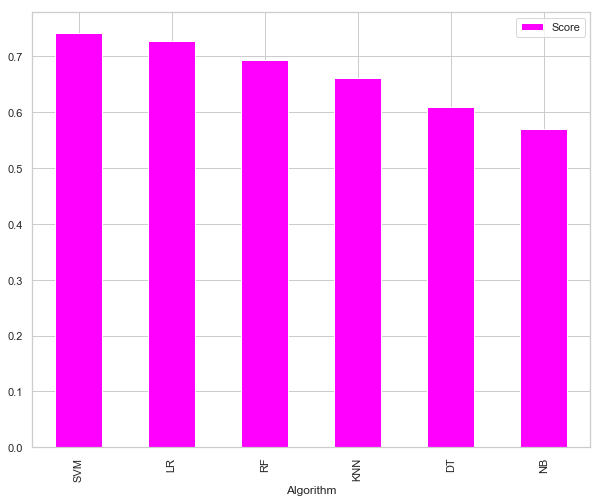

In [30]:
algo_com = pd.DataFrame({
    'Algorithm' : ['LR','DT','RF','SVM','KNN','NB'],
    'Score' : [log_reg_cv.mean(), dt_cls_cv.mean(), rf_cls_cv.mean(), sv_cls_cv.mean(), KNN_cls_cv.mean(), NB_cls_cv.mean()]
})
algo_com.groupby(['Algorithm']).mean().sort_values("Score", ascending=False).plot.bar(figsize = (10,8), color="magenta")

#### Making Predictions With Input

In [31]:
test_LR = log_reg.predict([[1,1, 62, 60,59 ,54, 47,33, 55,27, 12, 4,1,0, 0, 0, 0, 0, 0  ]])
print ('Logistic Regression: ', test_LR)
test_DT = dt_cls.predict([[1,1, 62, 60,59 ,54, 47,33, 55,27, 12, 4,1,0, 0, 0, 0, 0, 0  ]])
print ('Decision Tree: ',test_DT)
test_RF = rf_classifier.predict([[1,1, 62, 60,59 ,54, 47,33, 55,27, 12, 4,1,0, 0, 0, 0, 0, 0  ]])
print ('Random Forest: ',test_RF)
test_SVM = sv_classifier.predict([[1,1, 62, 60,59 ,54, 47,33, 55,27, 12, 4,1,0, 0, 0, 0, 0, 0  ]])
print ('Support Vector Machine: ',test_SVM)
test_KNN = sv_classifier.predict([[1,1, 62, 60,59 ,54, 47,33, 55,27, 12, 4,1,0, 0, 0, 0, 0, 0  ]])
print ('K-Nearest Neighbors: ',test_KNN)
test_NB = sv_classifier.predict([[1,1, 62, 60,59 ,54, 47,33, 55,27, 12, 4,1,0, 0, 0, 0, 0, 0  ]])
print ('Naive Bayes: ',test_NB)

Logistic Regression:  [1]
Decision Tree:  [0]
Random Forest:  [0]
Support Vector Machine:  [1]
K-Nearest Neighbors:  [1]
Naive Bayes:  [1]


#### Decision Tree and Random Forest mis classify DR. 